<a href="https://colab.research.google.com/github/brandon-baek/California-Housing-Data-Analysis-and-Prediction-Project/blob/main/California_Housing_Data_Exploration_and_Prediction_Modeling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **California Housing Data Exploration and Prediction Modeling Project**

---

**By Brandon Baek**

This Jupyter Notebook analyzes the California Housing Dataset and creates Predictive models fit on the data.

---



# **Prerequisites**

In [ ]:
!pip install --quiet keras_visualizer
from keras_visualizer import visualizer
from IPython.display import Image
import pandas as pd
from keras.optimizers import Adam
from keras import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.DataFrame(pd.read_csv("/content/sample_data/california_housing_train.csv"))

In [ ]:
df_test = pd.DataFrame(pd.read_csv("/content/sample_data/california_housing_test.csv"))

In [ ]:
def minmax(x, data):
    return (x - min(data)) / (max(data) - min(data))

# **Data Glance**

In [ ]:
df.head()
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.index

RangeIndex(start=0, stop=17000, step=1)

# **Exploration**

## **Overall Analysis**

Comparing the first 100 Datapoints of Population, Households, and Median Income to Median House Value

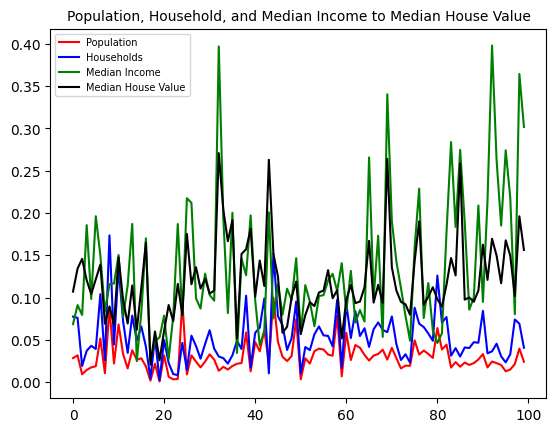

In [ ]:
plt.title("Population, Household, and Median Income to Median House Value", size=10)

plt.plot(df.index[:100], [minmax(i, df["population"]) for i in df["population"][:100]], color="red")
plt.plot(df.index[:100], [minmax(i, df["households"]) for i in df["households"][:100]], color="blue")
plt.plot(df.index[:100], [minmax(i, df["median_income"]) for i in df["median_income"][:100]], color="green")

plt.plot(df.index[:100], [minmax(i, df["median_house_value"]) for i in df["median_house_value"][:100]], color="black")

plt.legend(["Population", "Households", "Median Income", "Median House Value"], fontsize=7)

plt.show()

**Observations**
- Green and Black seem to correlate the most
    - Median Income and Median House Value, respectively

## **Individual Analysis**

### Scatterplots

3 Subplots are used to show the relationship between median income, population, and households to median house value in a scatter plot individually.

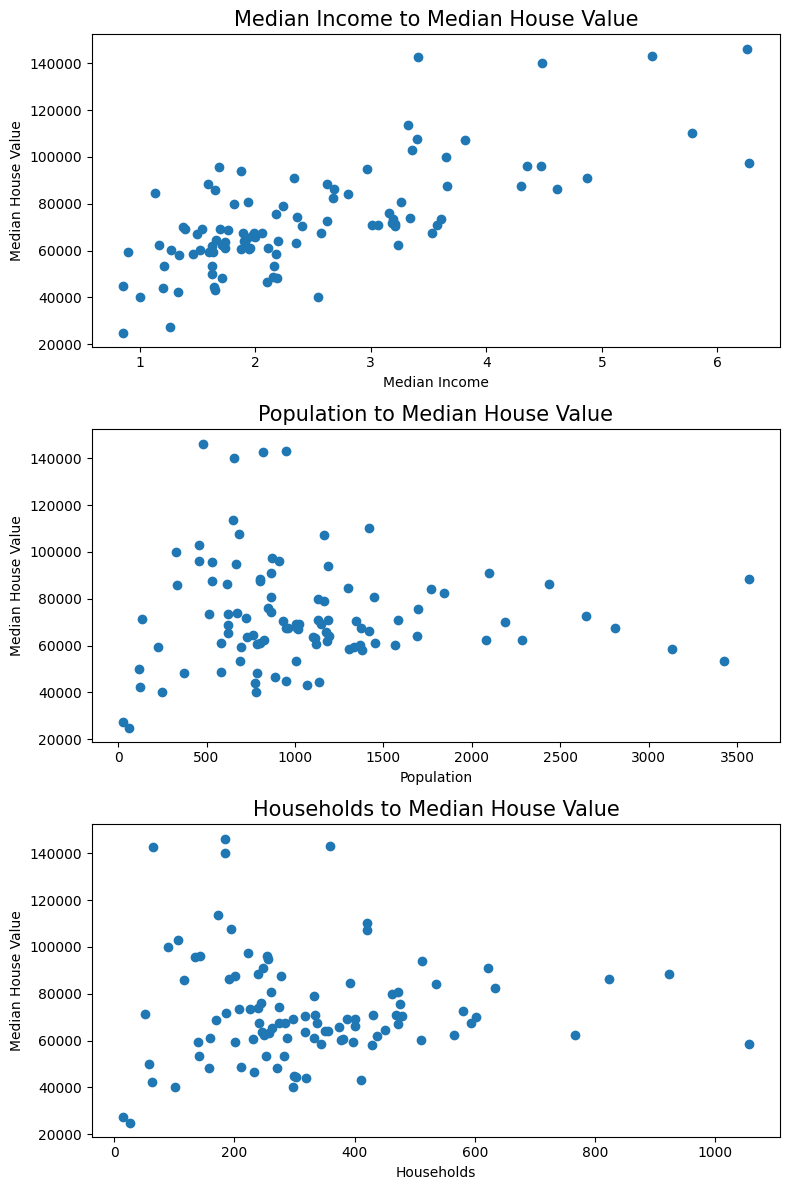

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

ax1.scatter(df['median_income'][:100], df['median_house_value'][:100])
ax1.set_xlabel("Median Income")
ax1.set_ylabel("Median House Value")
ax1.set_title("Median Income to Median House Value", size=15)

ax2.scatter(df['population'][:100], df['median_house_value'][:100])
ax2.set_xlabel("Population")
ax2.set_ylabel("Median House Value")
ax2.set_title("Population to Median House Value", size=15)

ax3.scatter(df['households'][:100], df['median_house_value'][:100])
ax3.set_xlabel("Households")
ax3.set_ylabel("Median House Value")
ax3.set_title("Households to Median House Value", size=15)

plt.tight_layout()
plt.show()

**Observations**
- No clear correlation
- Median Income to Median House Value expresses most correlation
    - A positive correlation

### Correlation Coefficient

This approach re-explores the entire dataset to find the best correlation matches.

A simple script generated by Gemini in order to create a list of Correlation Coefficients and the corresponding key values in descending order to easily observe highly correlated variables.

In [ ]:
def sort_by_correlation(df, target):
    try:
        return df.corr()[target].drop(target).abs().sort_values(ascending=False)
    except (KeyError, TypeError):
        return pd.Series()

In [ ]:
sort_by_correlation(df, 'median_house_value')

,median_house_value
median_income,0.691871
latitude,0.144917
total_rooms,0.130991
housing_median_age,0.106758
households,0.061031
total_bedrooms,0.045783
longitude,0.044982
population,0.027850


**Observations**
- Median Income is the only category that has a correlation with Median House Value.

## **Correlations Analysis**

This analysis explores all categories to find the category with the highest frequency of high correlation.

Prints all sorted lists of correlation for every category.

In [ ]:
for key in df.keys():
    print(f'--- {key} ---')
    print(sort_by_correlation(df, key))
    print('\n\n')

--- longitude ---
latitude              0.925208
housing_median_age    0.114250
population            0.101674
total_bedrooms        0.071802
households            0.059628
total_rooms           0.047010
median_house_value    0.044982
median_income         0.015485
Name: longitude, dtype: float64



--- latitude ---
longitude             0.925208
median_house_value    0.144917
population            0.111261
median_income         0.080303
households            0.074902
total_bedrooms        0.069373
total_rooms           0.038773
housing_median_age    0.016454
Name: latitude, dtype: float64



--- housing_median_age ---
total_rooms           0.360984
total_bedrooms        0.320434
households            0.302754
population            0.295890
median_income         0.115932
longitude             0.114250
median_house_value    0.106758
latitude              0.016454
Name: housing_median_age, dtype: float64



--- total_rooms ---
total_bedrooms        0.928403
households            0.919018

**Observations**
- Total rooms, total bedrooms, total households, and population have high correlation

# **Prediction Models**

## **Multiple Linear Regression Model**

3 independent variables (Total rooms, total bedrooms, total households) will be related to 1 dependent variable (Population).

Due to the plurality of independent variables, rather than a regular linear regression model, a multiple linear regression model must be used.

In [ ]:
X = df[['total_rooms', 'total_bedrooms', 'households']]
y = df['population']

In [ ]:
model = LinearRegression().fit(X, y)

Visualizing model by scatter plotting all independent variables with the same dependent variable, then creating an X range for the model to predict, then plotting all predictions made.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


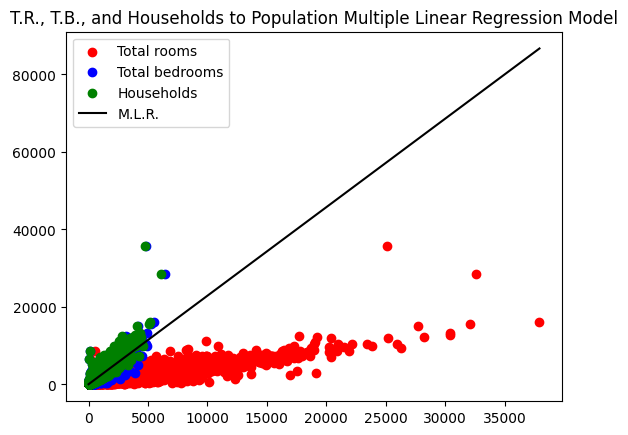

In [ ]:
plt.title("T.R., T.B., and Households to Population Multiple Linear Regression Model")

plt.scatter(df['total_rooms'], df['population'], color='red')
plt.scatter(df['total_bedrooms'], df['population'], color='blue')
plt.scatter(df['households'], df['population'], color='green')

X_range = np.linspace(0, max(df['total_rooms'].max(), df['total_bedrooms'].max(), df['households'].max()), 100).reshape(-1, 1)
y_pred = model.predict(np.hstack([X_range, X_range, X_range]))

plt.plot(X_range, y_pred, color='black')

plt.legend(['Total rooms', 'Total bedrooms', 'Households', 'M.L.R.'])

plt.show()

### **Evaluation**

**Mean Absolute Error** (MAE)

In [ ]:
np.mean(np.abs(df_test['population'] - model.predict(df_test[['total_rooms', 'total_bedrooms', 'households']])))

273.0197130319185

## **Linear Regression Model**

In order to ensure highest model performance, a regular linear regression model is fit for each independent variable (Total rooms, total bedrooms, households) and the same dependent variable (Population).

### Total Rooms

In [ ]:
X = df[['total_rooms']]
y = df['population']

model = LinearRegression().fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


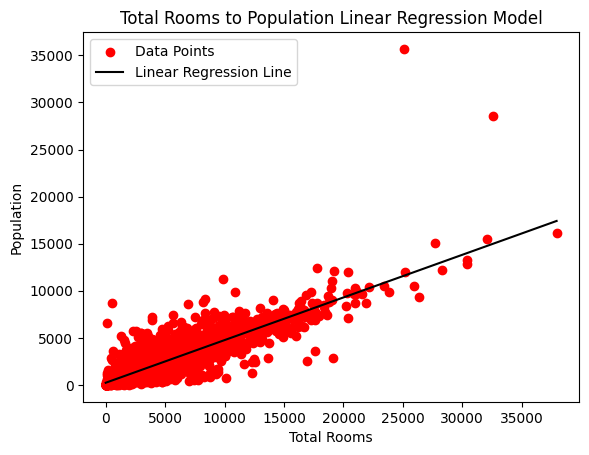

In [ ]:
plt.title("Total Rooms to Population Linear Regression Model")

plt.scatter(df['total_rooms'], df['population'], color='red')

X_range = np.linspace(df['total_rooms'].min(), df['total_rooms'].max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

plt.plot(X_range, y_pred, color='black')

plt.legend(['Data Points', 'Linear Regression Line'])

plt.xlabel("Total Rooms")
plt.ylabel("Population")

plt.show()

**Mean Absolute Error** (MAE)

In [ ]:
np.mean(np.abs(df_test['population'] - model.predict(df_test[['total_rooms']])))

355.7832009081395

### Total Bedrooms

In [ ]:
X = df[['total_bedrooms']]
y = df['population']

model = LinearRegression().fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


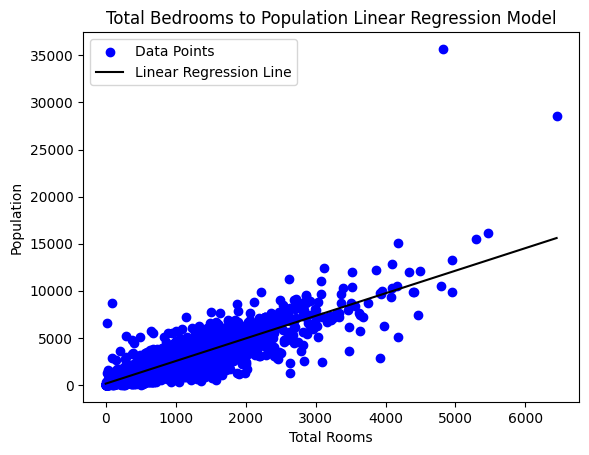

In [ ]:
plt.title("Total Bedrooms to Population Linear Regression Model")

plt.scatter(df['total_bedrooms'], df['population'], color='blue')

X_range = np.linspace(df['total_bedrooms'].min(), df['total_bedrooms'].max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

plt.plot(X_range, y_pred, color='black')

plt.legend(['Data Points', 'Linear Regression Line'])

plt.xlabel("Total Rooms")
plt.ylabel("Population")

plt.show()

**Mean Absolute Error** (MAE)

In [ ]:
np.mean(np.abs(df_test['population'] - model.predict(df_test[['total_bedrooms']])))

320.83468494715606

### Households

In [ ]:
X = df[['households']]
y = df['population']

model = LinearRegression().fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


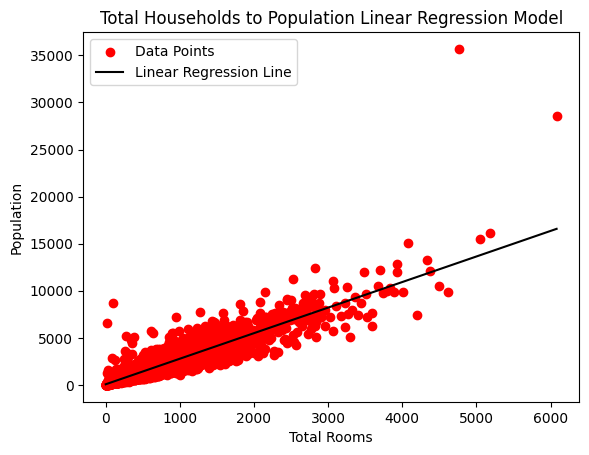

In [ ]:
plt.title("Total Households to Population Linear Regression Model")

plt.scatter(df['households'], df['population'], color='red')

X_range = np.linspace(df['households'].min(), df['households'].max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

plt.plot(X_range, y_pred, color='black')

plt.legend(['Data Points', 'Linear Regression Line'])

plt.xlabel("Total Rooms")
plt.ylabel("Population")

plt.show()

**Mean Absolute Error** (MAE)

In [ ]:
np.mean(np.abs(df_test['population'] - model.predict(df_test[['households']])))

274.89090659530154

## **Model Comparison and Analysis**

After comparing the models, the smallest MAE value was returned by the Multiple Linear Regression model.

Model Performance Data (Mean Absolute Error):
- Multiple Linear Regression: 273.0197130319185
- Total Rooms Linear Regression: 355.7832009081395
- Total Bedrooms Linear Regression: 320.83468494715606
- Households Linear Regression: 274.89090659530154

This list not only shows that the Multiple Linear Regression model is superior, but also that the number of households carries the highest amount of correlation with the population.

An analysis on the graphs of each model revealed a new factor that could be greatly affecting results. Outliers. Although visibility of outliers in the scatter plot graph of the Multiple Linear Regression model is limited, when viewing the scatter plot for each data individually, outliers are seen very clearly and although their effects maybe miniscule, it provides an opportunity for the models to be improved.

## **Outlier Addressed Linear Regression Models**

> Add blockquote



The Linear Regression models will be refitted using data that has eliminated any outliers.

Utilizing the Interquartile Range Technique, the outliers can be easily removed by creating a boundary for values in a dataset. Any point escaping this boundary being removed.

Copies and filters dataframe using interquartile range technique.

In [ ]:
columns_to_filter = ['total_rooms', 'total_bedrooms', 'households']
filtered_df = df.copy()

for col in columns_to_filter:
    Q1 = filtered_df[col].quantile(0.25)
    Q3 = filtered_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]

In [ ]:
filtered_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


Initializing and evaluating all models immediately.

Multiple Linear Regression

In [ ]:
X = df[['total_rooms', 'total_bedrooms', 'households']]
y = df['population']

model = LinearRegression().fit(X, y)

np.mean(np.abs(df_test['population'] - model.predict(df_test[['total_rooms', 'total_bedrooms', 'households']])))

273.0197130319185

Total Rooms Linear Regression

In [ ]:
X = df[['total_rooms']]
y = df['population']

model = LinearRegression().fit(X, y)

np.mean(np.abs(df_test['population'] - model.predict(df_test[['total_rooms']])))

355.7832009081395

Total Bedrooms Linear Regression

In [ ]:
X = df[['total_bedrooms']]
y = df['population']

model = LinearRegression().fit(X, y)

np.mean(np.abs(df_test['population'] - model.predict(df_test[['total_bedrooms']])))

320.83468494715606

Households Linear Regression

In [ ]:
X = df[['households']]
y = df['population']

model = LinearRegression().fit(X, y)

np.mean(np.abs(df_test['population'] - model.predict(df_test[['households']])))

274.89090659530154

A quick view of the results reveal that the outliers carried practically no effect onto the performance of the Linear Regression models.

# **Project Conclusion**

This project has discovered correlated variables within the California Housing Dataset. Total rooms, total bedrooms, and households were found to be correlated with the population.

Using these correlations, multiple Linear Regression models were created and updated in order to find the best results. Multiple Linear Regression models were explored, in order to utilize all 3 independent variables (Total rooms, total bedrooms, households) to find the 1 dependent variable (population).

The final model, a Multiple Linear Regression model, achieved a Mean Absolute Error of 273.0197130319185.